In [1]:
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install pandas_profiling
# pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_profiling

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

## Exploring Data

In [5]:
# from google.colab import files 
# uploaded = files.upload()

In [6]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum() #count the missing values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.shape #number of rows and columns
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.target.value_counts() #object containing counts of unique values

1    165
0    138
Name: target, dtype: int64

In [13]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile

## Data Preprocessing
 1) outliers
 2) label encoding
 3) No missin

In [14]:
def drop_outliers(data, field_name):
    iqr = 1.5 * (np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)


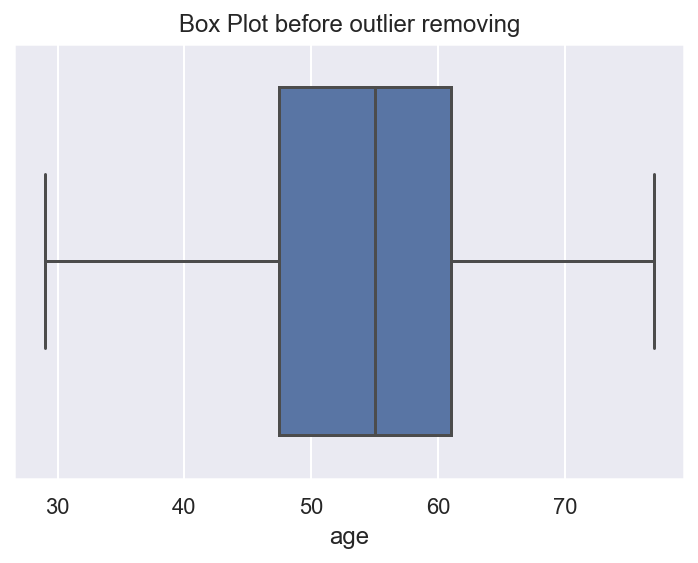

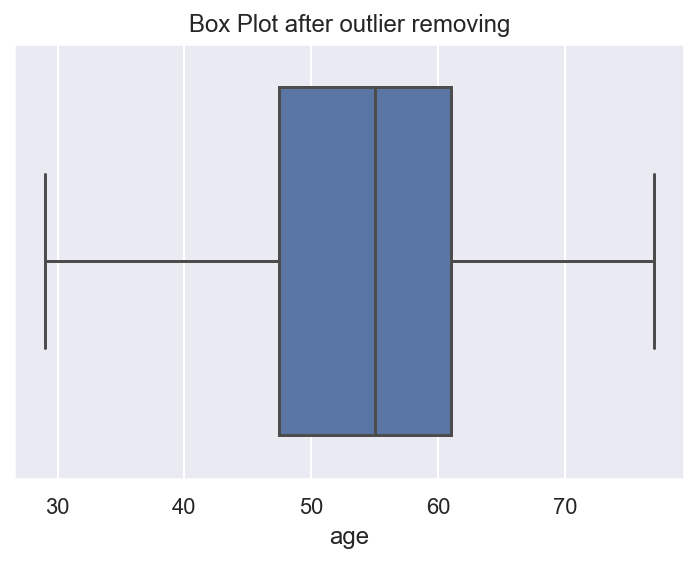

In [15]:
#Outliers 
sns.boxplot(x=df['age'])
plt.title("Box Plot before outlier removing")
plt.show()


drop_outliers(df, 'age')
sns.boxplot(x=df['age'])
plt.title("Box Plot after outlier removing")
plt.show()

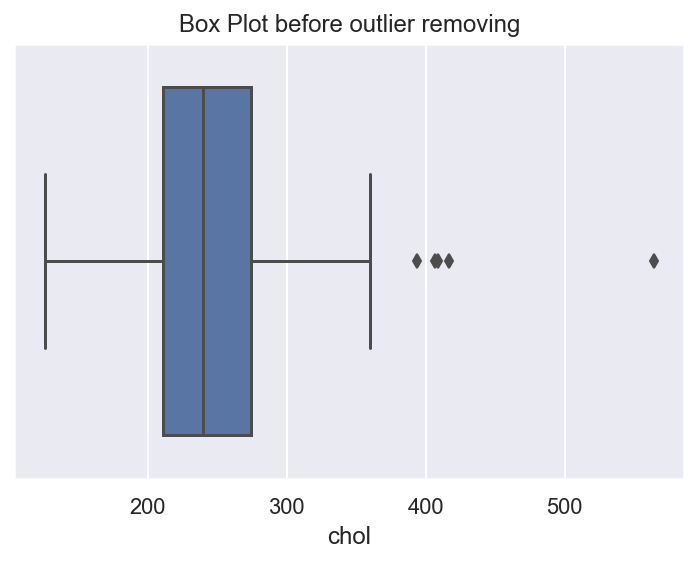

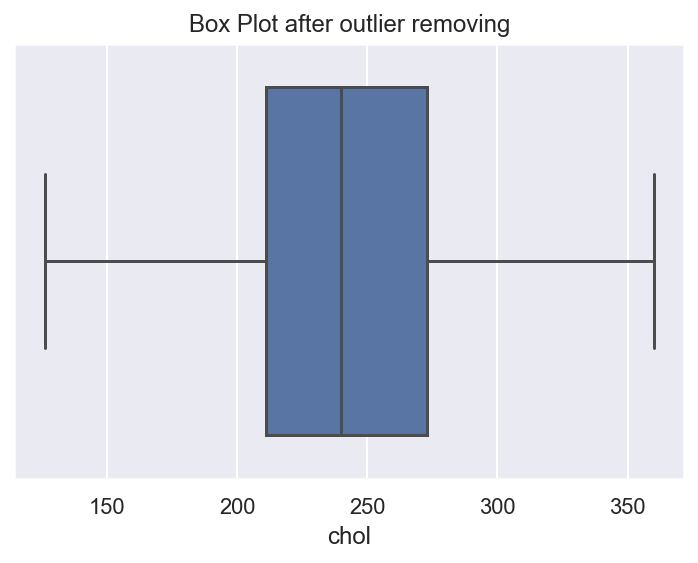

In [16]:
sns.boxplot(x=df['chol'])
plt.title("Box Plot before outlier removing")
plt.show()


drop_outliers(df, 'chol')
sns.boxplot(x=df['chol'])
plt.title("Box Plot after outlier removing")
plt.show()

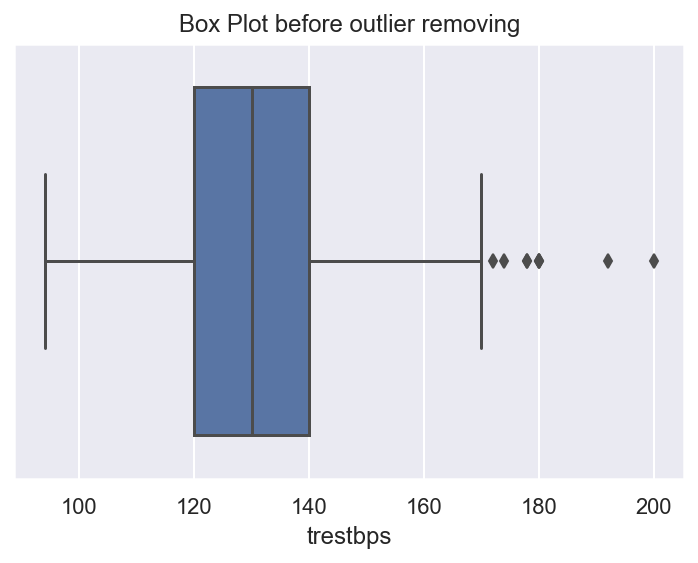

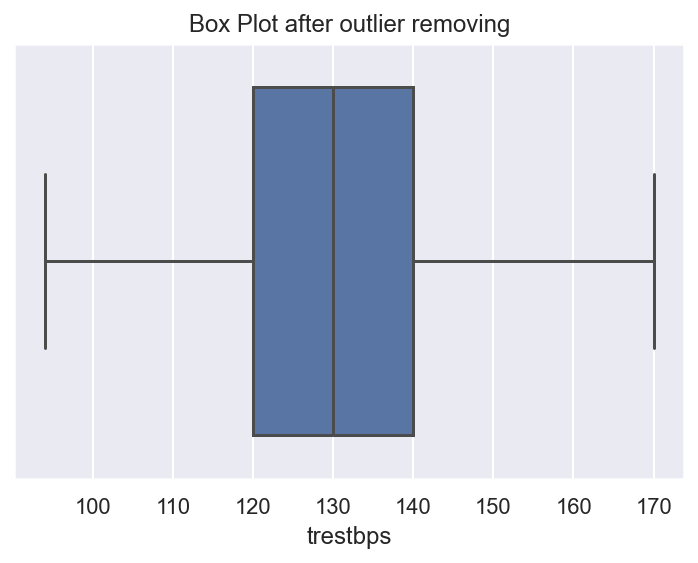

In [17]:
sns.boxplot(x=df['trestbps'])
plt.title("Box Plot before outlier removing")
plt.show()


drop_outliers(df, 'trestbps')
sns.boxplot(x=df['trestbps'])
plt.title("Box Plot after outlier removing")
plt.show()

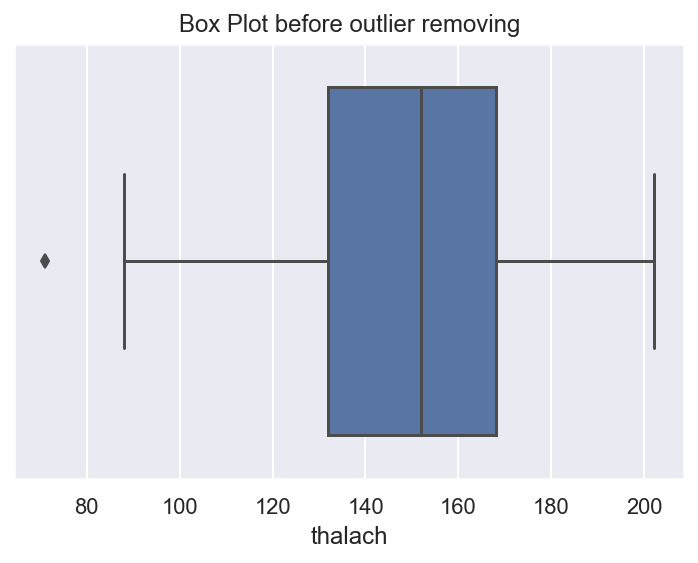

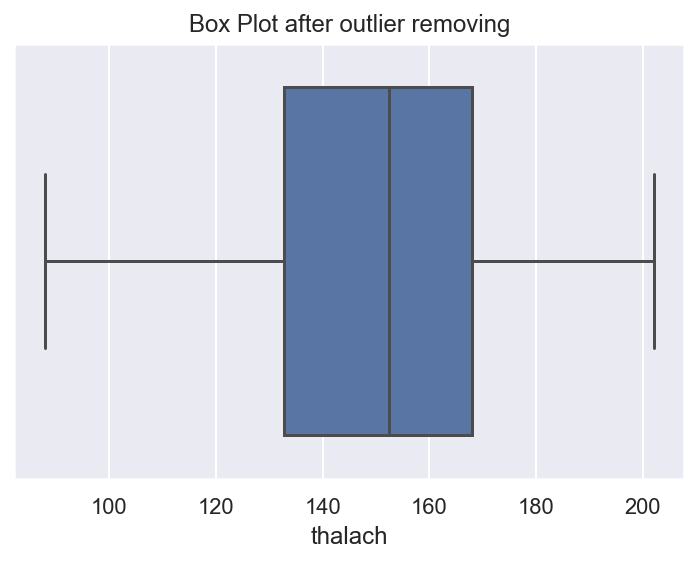

In [18]:
sns.boxplot(x=df['thalach'])
plt.title("Box Plot before outlier removing")
plt.show()




drop_outliers(df, 'thalach')
sns.boxplot(x=df['thalach'])
plt.title("Box Plot after outlier removing")
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Selection

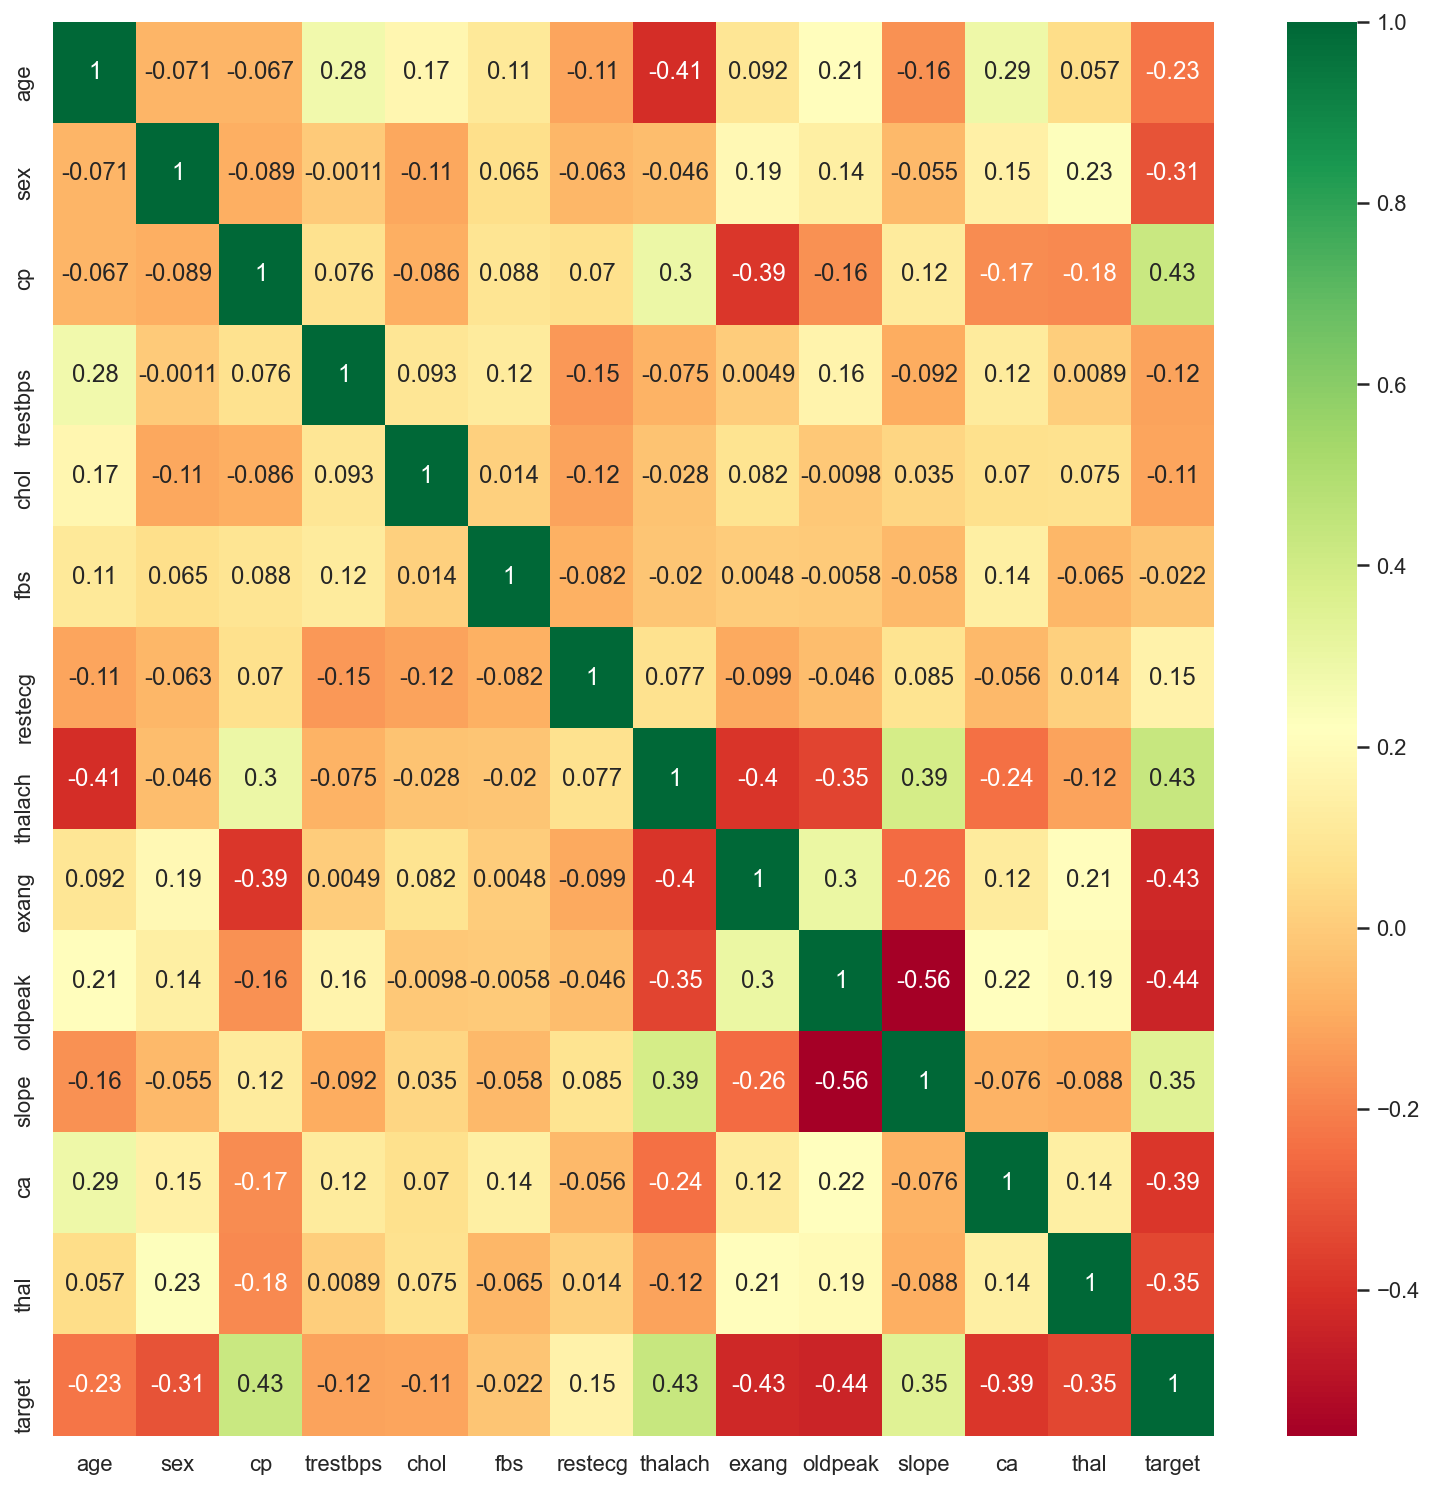

In [21]:
#To see if all features are positively correlated or negatively correlated
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Visualization

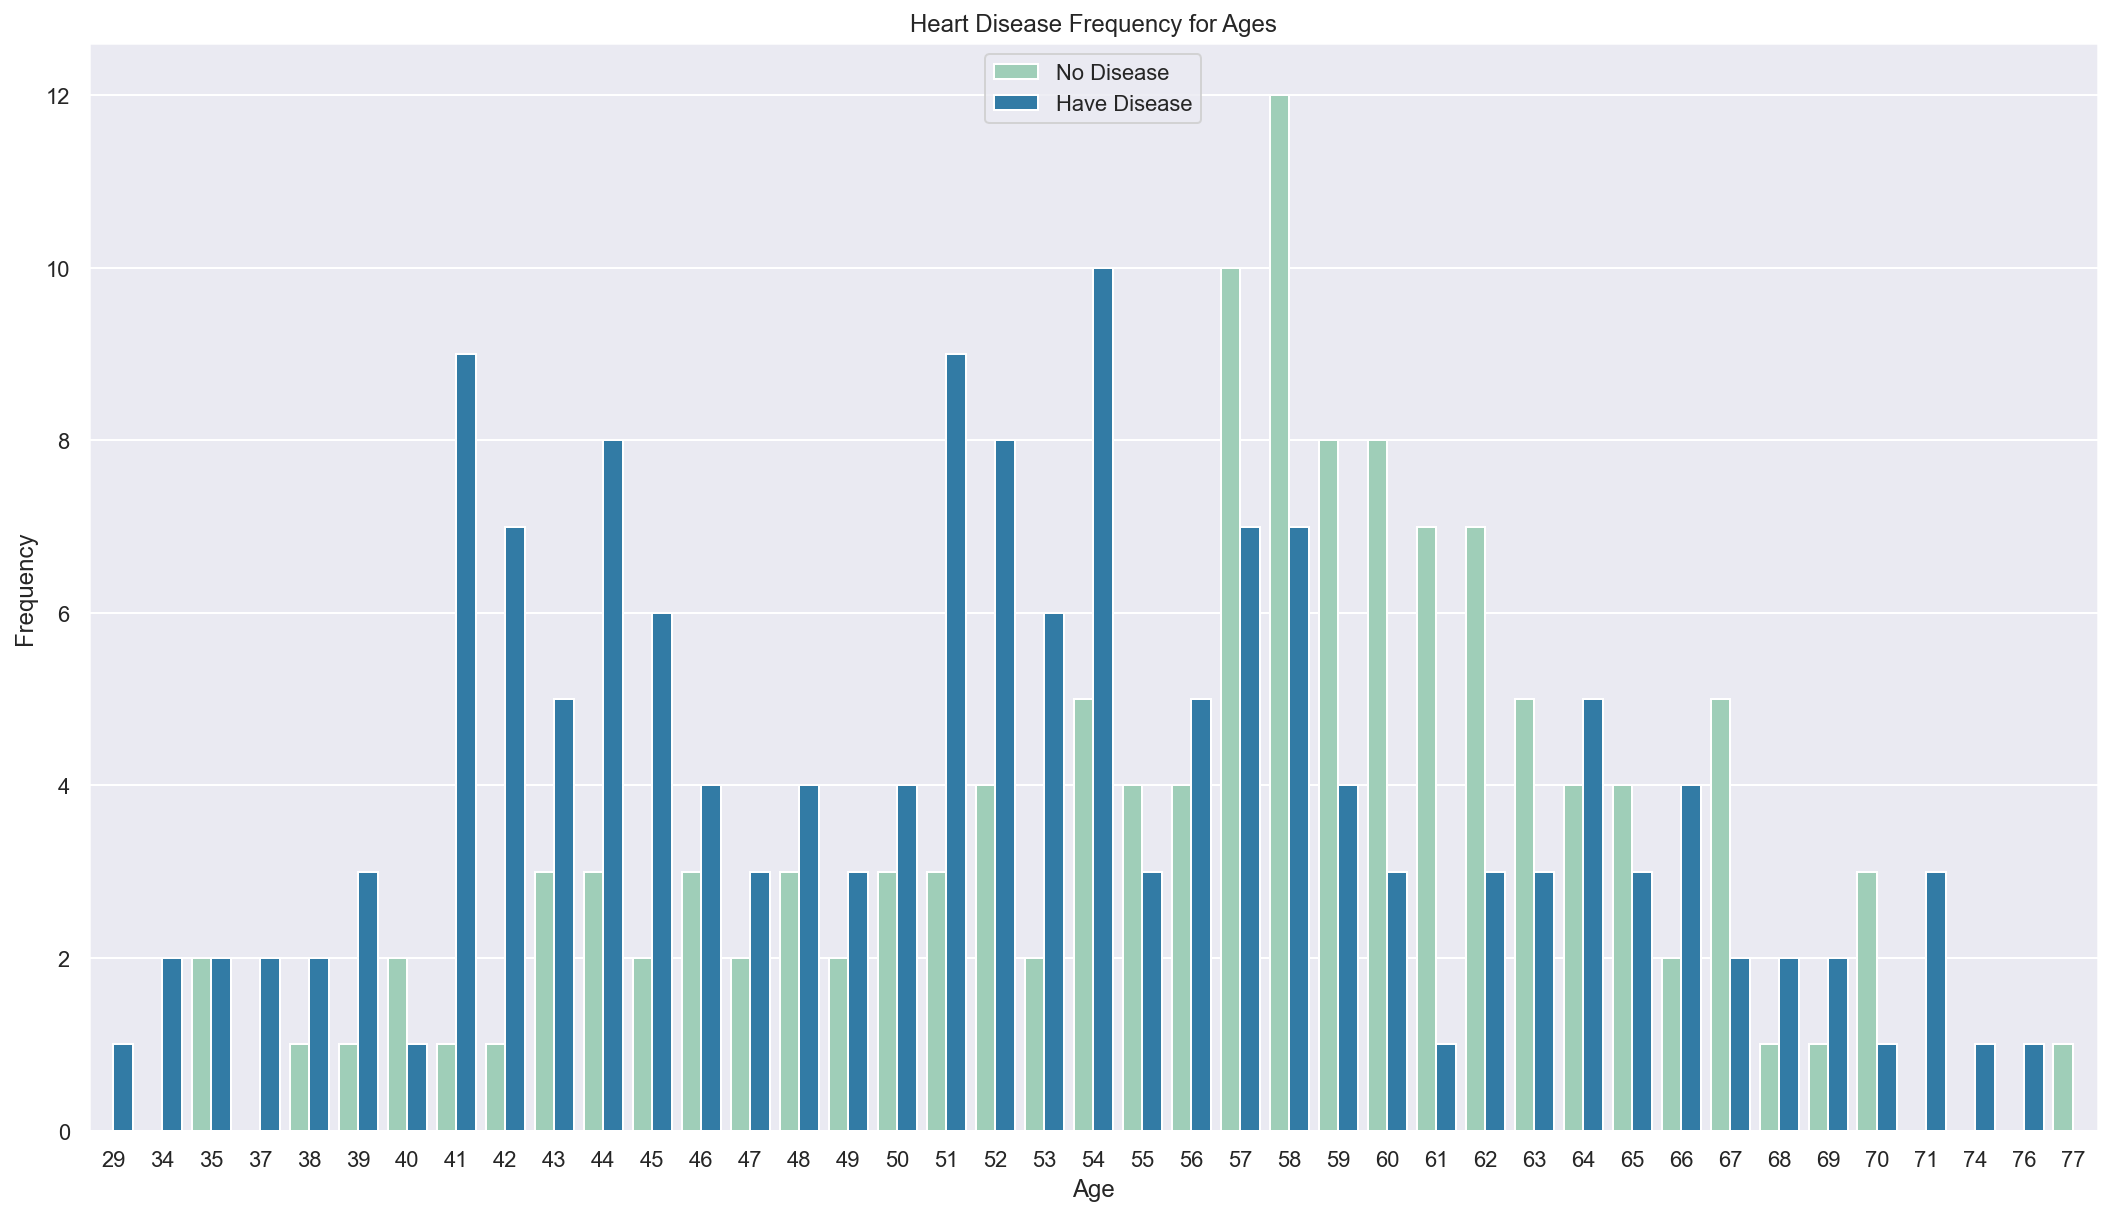

In [22]:
#Age distribution - can be discretized 
plt.figure(figsize=(18, 10))
sns.countplot(x='age', hue='target', data=df, palette="YlGnBu")
plt.legend(["No Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

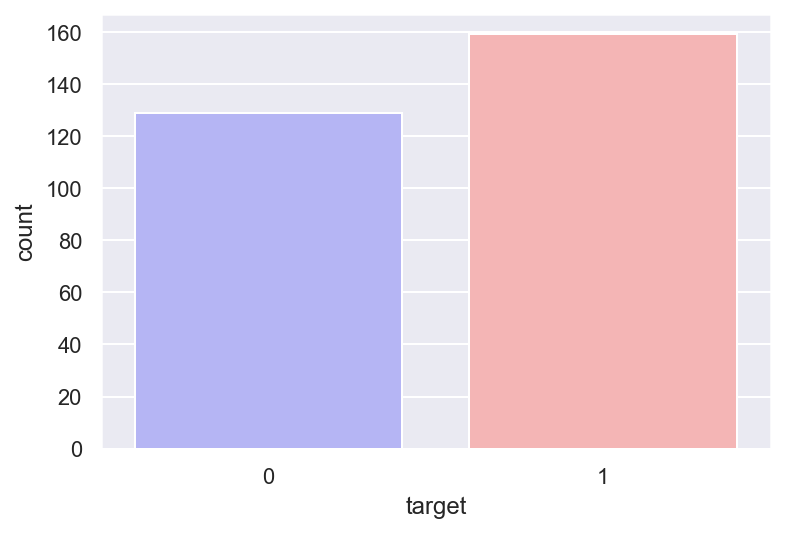

Percentage of Patients not having Heart Disease: 44.79%
Percentage of Patients having Heart Disease: 55.21%


In [23]:
#Percentage of sample that has heart disease
sns.countplot(x="target", data=df, palette="bwr")
plt.show()
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients not having Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients having Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

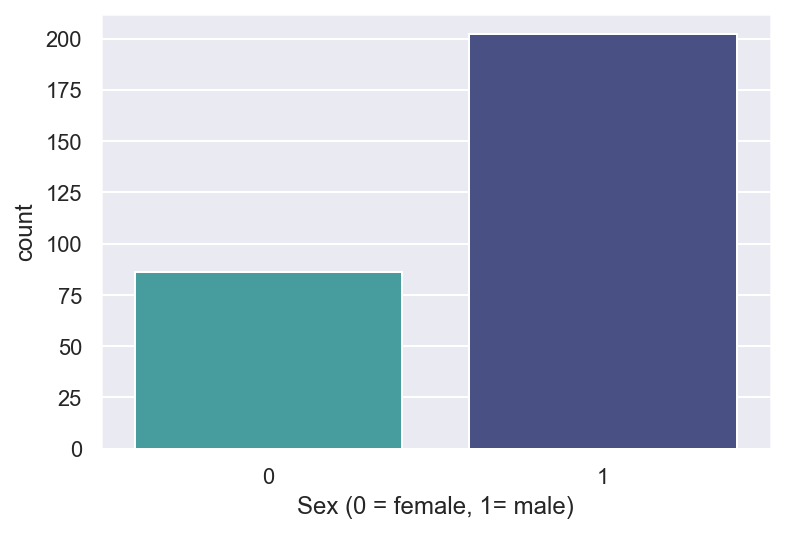

Percentage of Female Patients: 29.86%
Percentage of Male Patients: 70.14%


In [24]:
#Gender percentage in the dataset
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

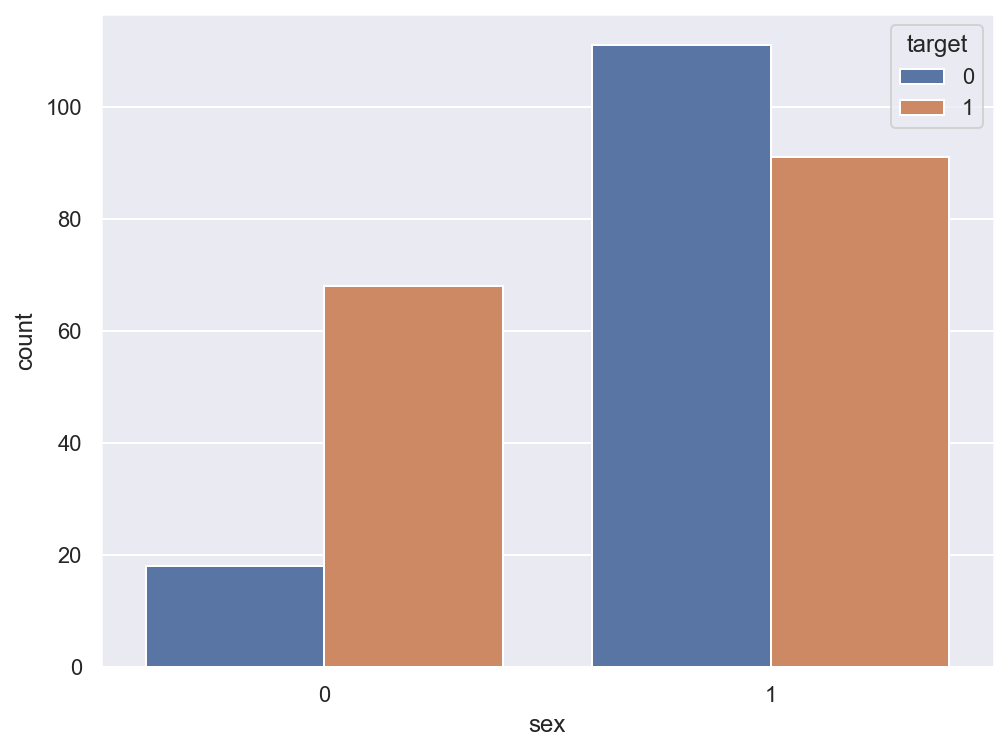

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()


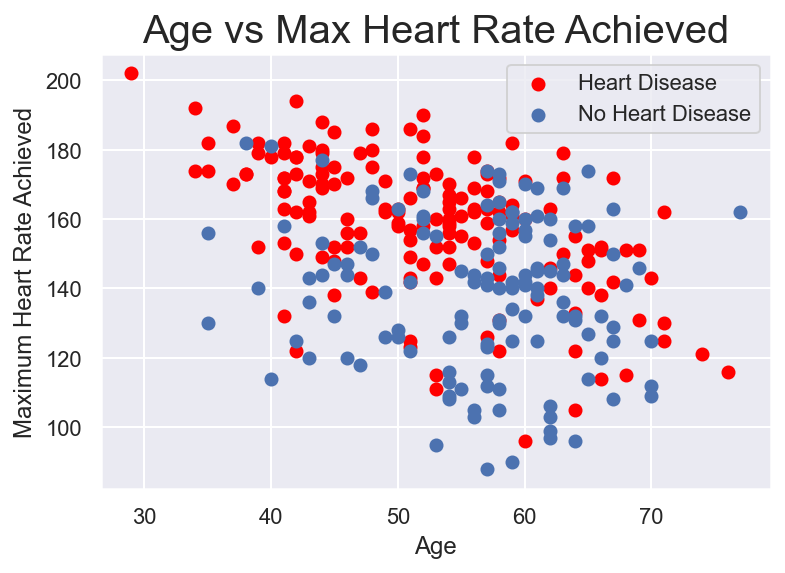

In [26]:
#Relation of Max Heart Rate and Age with Having heart disease
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.title('Age vs Max Heart Rate Achieved', fontsize = 20)
plt.show()

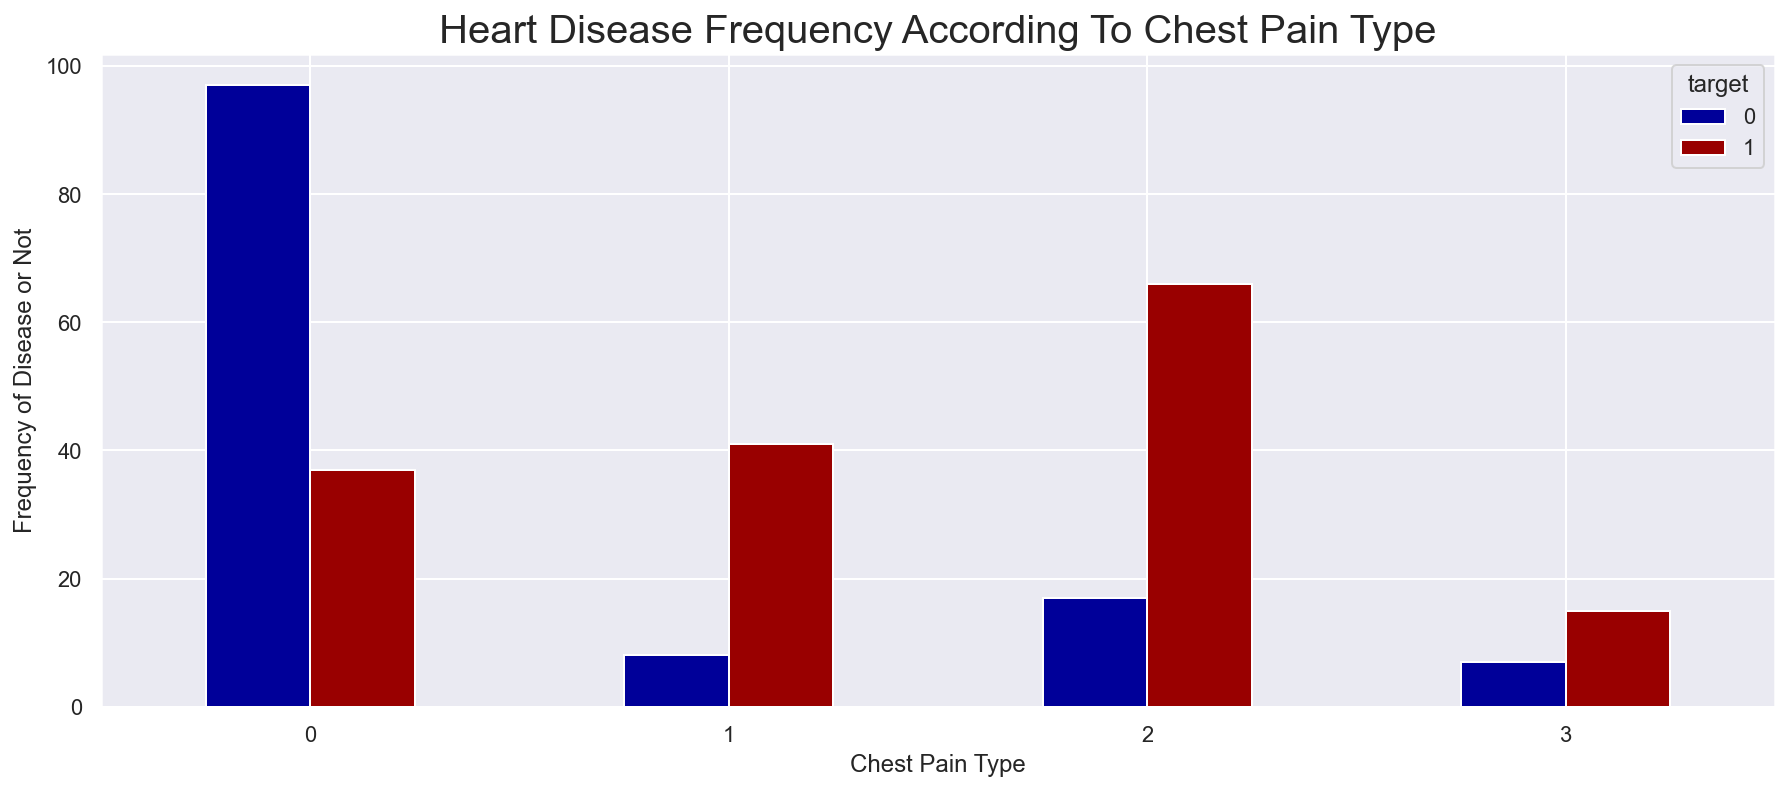

In [27]:
#Relation of chest pain type and heart disease frequency 
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#000099','#990000'])
plt.title('Heart Disease Frequency According To Chest Pain Type'  , fontsize = 20)
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

# 0= typical type 1
# 1= typical type angina
# 2= non-angina pain
# 3= asymptomatic

## Discretization

In [28]:
#finding min and max ages
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.02777777777778


Young Ages : 16
Middle Ages : 126
Elderly Ages : 139


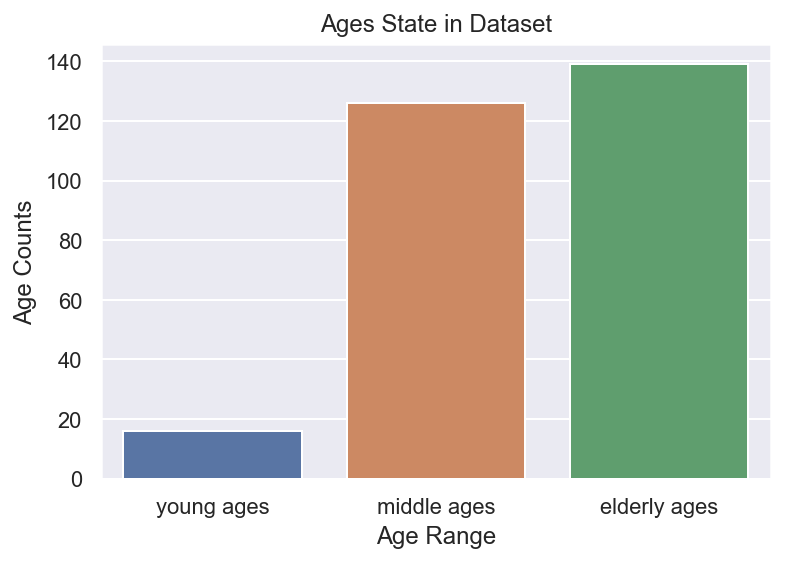

In [29]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()
# so,a new feature value can be removed from these age ranges will not affect this impact will see in the future.

In [30]:
df['AgeRange']=0
youngAge_index=df[(df.age>=29)&(df.age<40)].index
middleAge_index=df[(df.age>=40)&(df.age<55)].index
elderlyAge_index=df[(df.age>55)].index
for index in elderlyAge_index:
    df.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    df.loc[index,'AgeRange']=1

for index in youngAge_index:
    df.loc[index,'AgeRange']=0

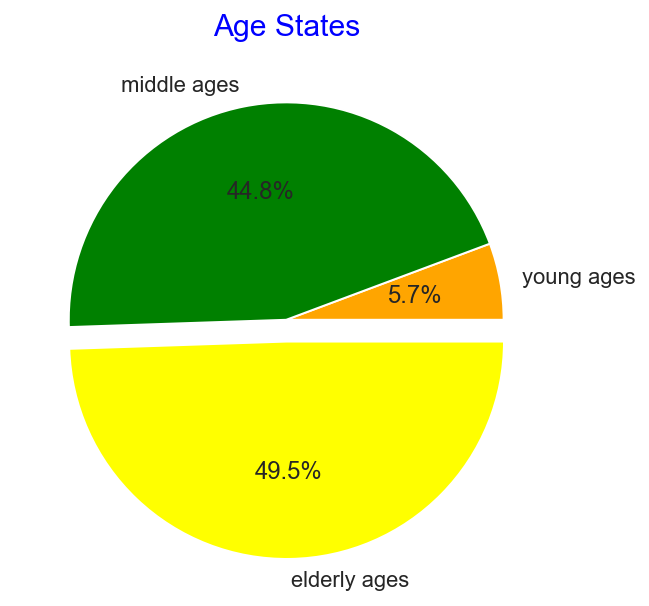

In [31]:
explode = [0,0,0.1]
colors = ['orange','green','yellow']
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],
        labels=['young ages','middle ages','elderly ages'],
        explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

## Age analysis

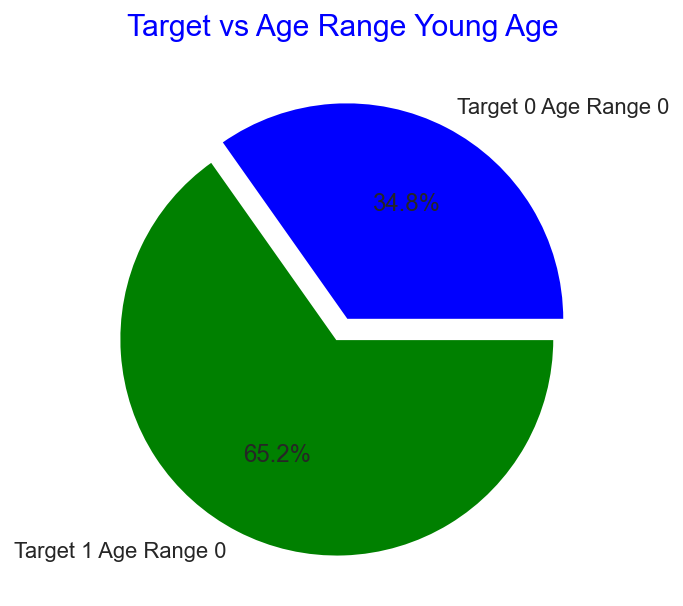

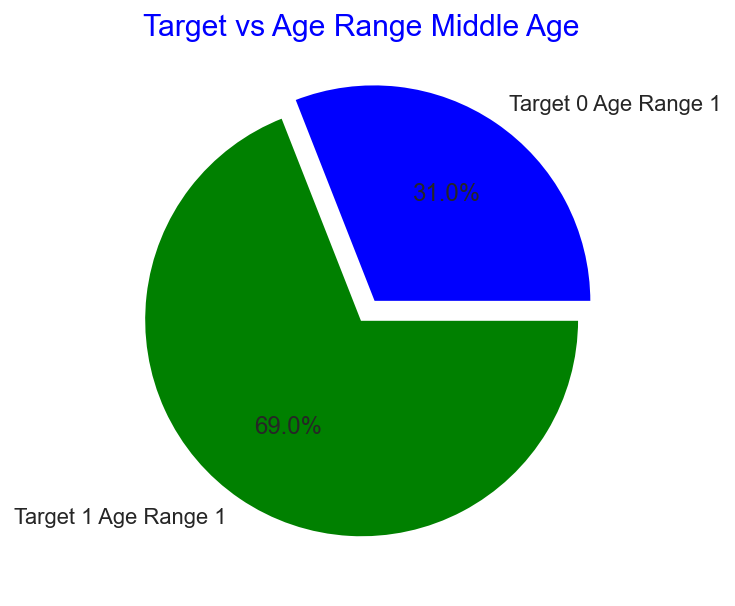

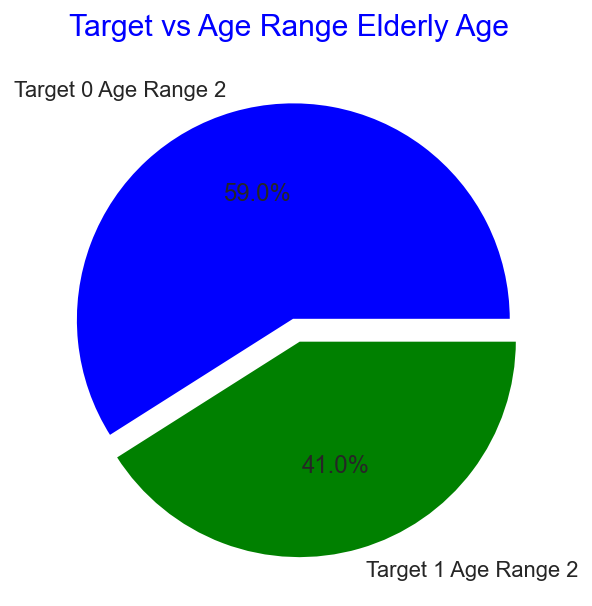

In [32]:
target_0_agerang_0=len(df[(df.target==0)&(df.AgeRange==0)])
target_1_agerang_0=len(df[(df.target==1)&(df.AgeRange==0)])
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, 
        labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()
target_0_agerang_1=len(df[(df.target==0)&(df.AgeRange==1)])
target_1_agerang_1=len(df[(df.target==1)&(df.AgeRange==1)])
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode,
        labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()
target_0_agerang_2=len(df[(df.target==0)&(df.AgeRange==2)])
target_1_agerang_2=len(df[(df.target==1)&(df.AgeRange==2)])

explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode,
        labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

# Chest Pain Type Analysis

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


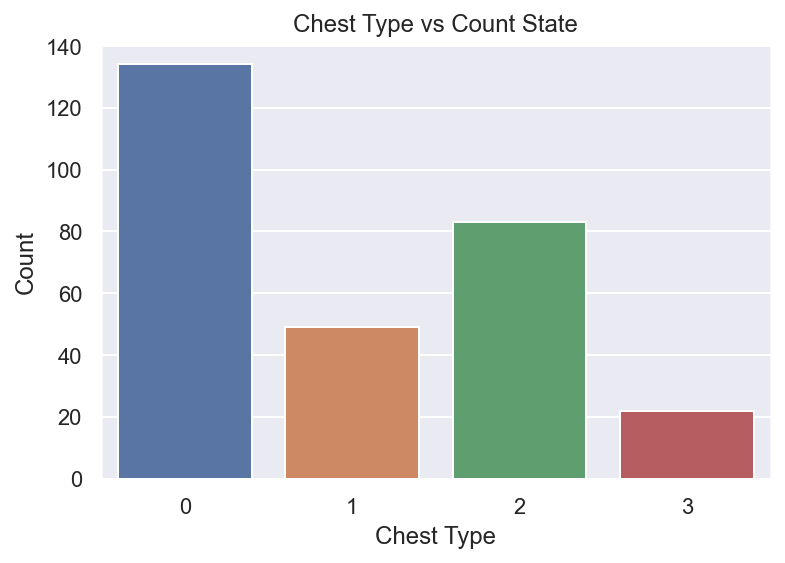

In [33]:
sns.countplot(df.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

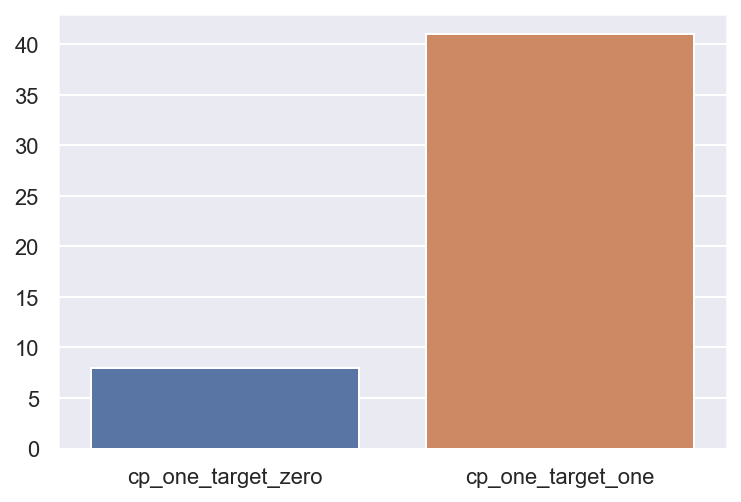

In [34]:
cp_one_target_zero=len(df[(df.cp==1)&(df.target==0)])
cp_one_target_one=len(df[(df.cp==1)&(df.target==1)])
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()
#people having disease when they have chest pain and not having disease when they have chest pain

# Thalach Analysis
The analysis in the case of maximum heart rate achieved.

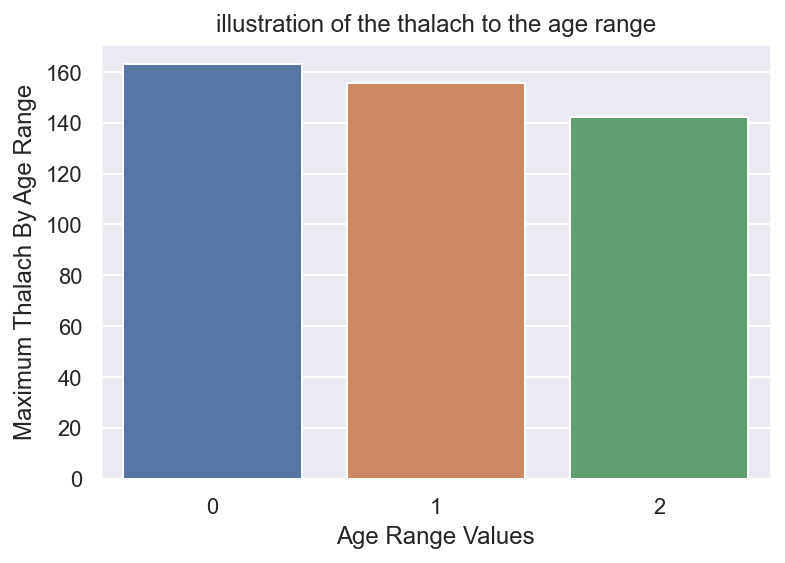

In [35]:
age_range_thalach=df.groupby('AgeRange')['thalach'].mean()
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()


#Trestbp Analysis
relation of attributes with resting blood pressure

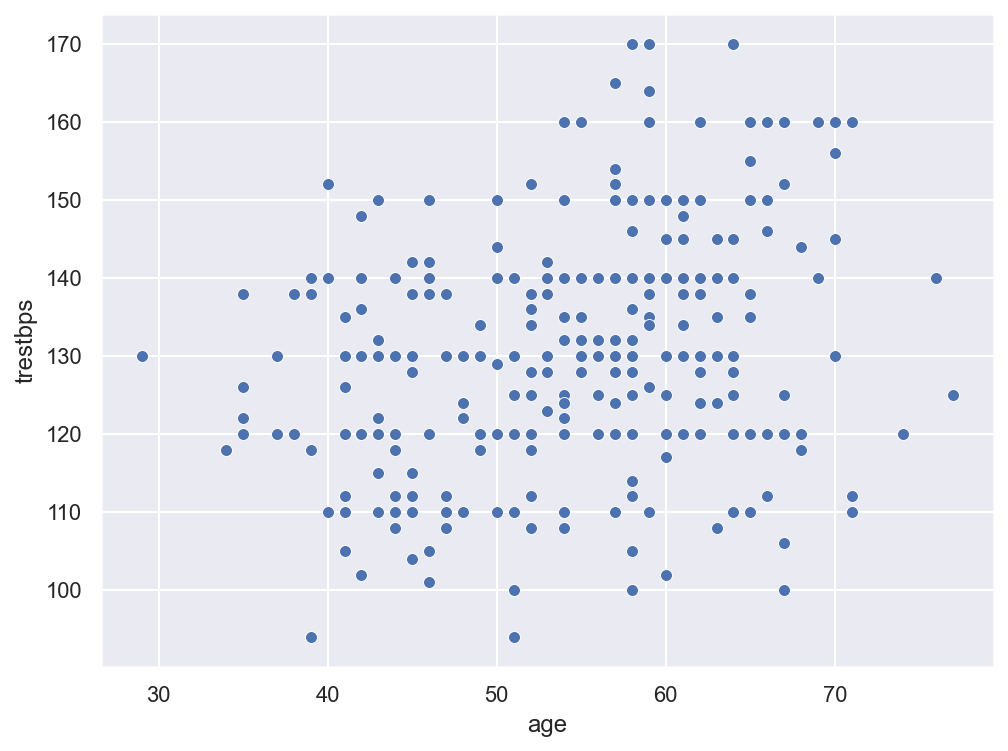

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()


# Exang analysis
The analysis of Exercise induced angina

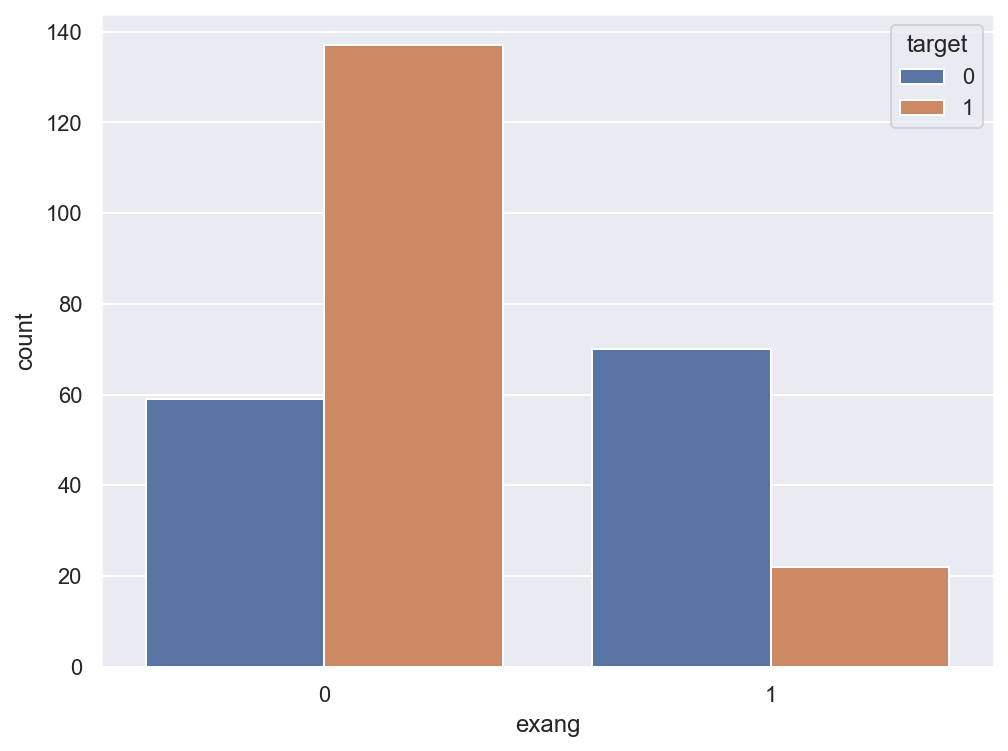

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="exang", hue="target", data=df)
plt.show()


# Making predictions

In [38]:
X= df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 0)

In [39]:
#refining column names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target' , '']
df.drop(columns = '' , axis = 1)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Feature Scaling


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


# 1. Logistic regression


In [41]:

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [42]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [44]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [45]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [46]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [47]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [48]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [49]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [50]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    acc = (100 - np.mean(np.abs(y_prediction - y_test))*100)
    # accuracies['Logistic regression'] = acc
    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.36188403351635146


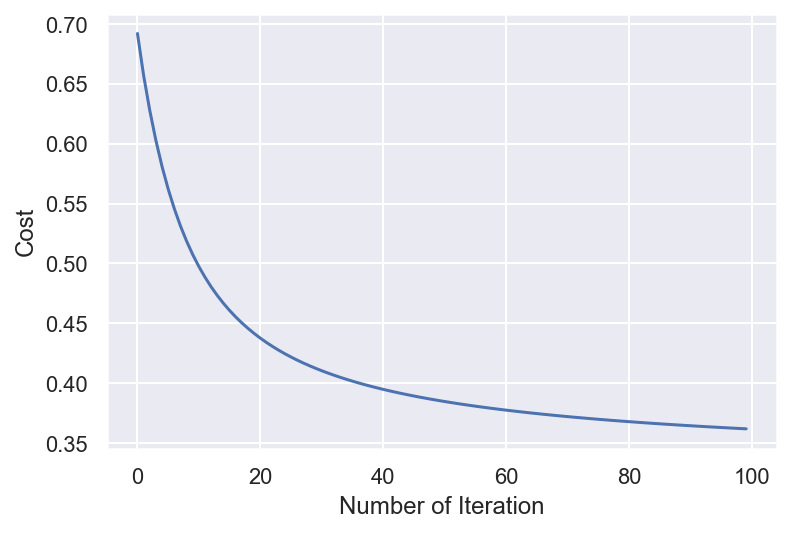

Manual Test Accuracy: 75.86%


In [51]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [52]:
accuracies = {}
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 77.59%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 2. k-Nearest Neighbour Algorithm


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.59%


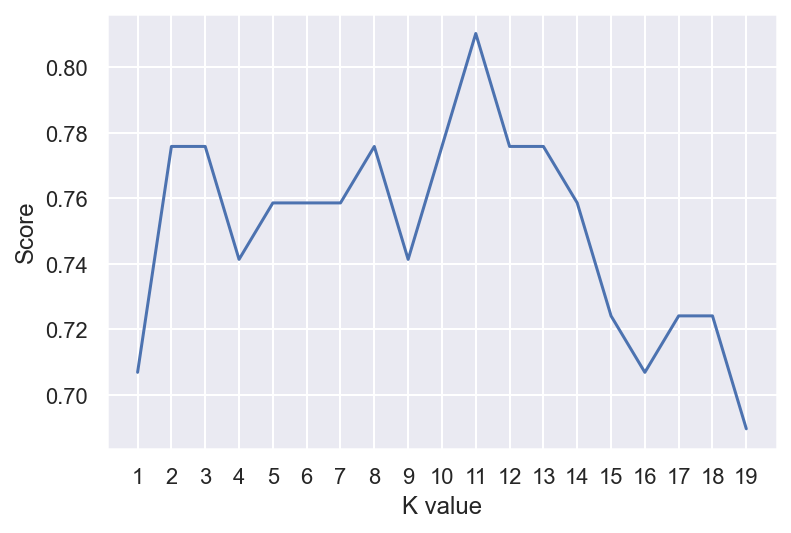

Maximum KNN Score is 81.03%


In [54]:
scoreList = []

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))
#Maximum KNN score is for K value = 11

In [55]:
from sklearn.metrics import classification_report
cp = classification_report(y_test, prediction)
print(cp)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.79      0.77      0.78        30

    accuracy                           0.78        58
   macro avg       0.78      0.78      0.78        58
weighted avg       0.78      0.78      0.78        58



# 3. Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 75.86%


# 4. SVM

In [57]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 77.59%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 6. Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.86%


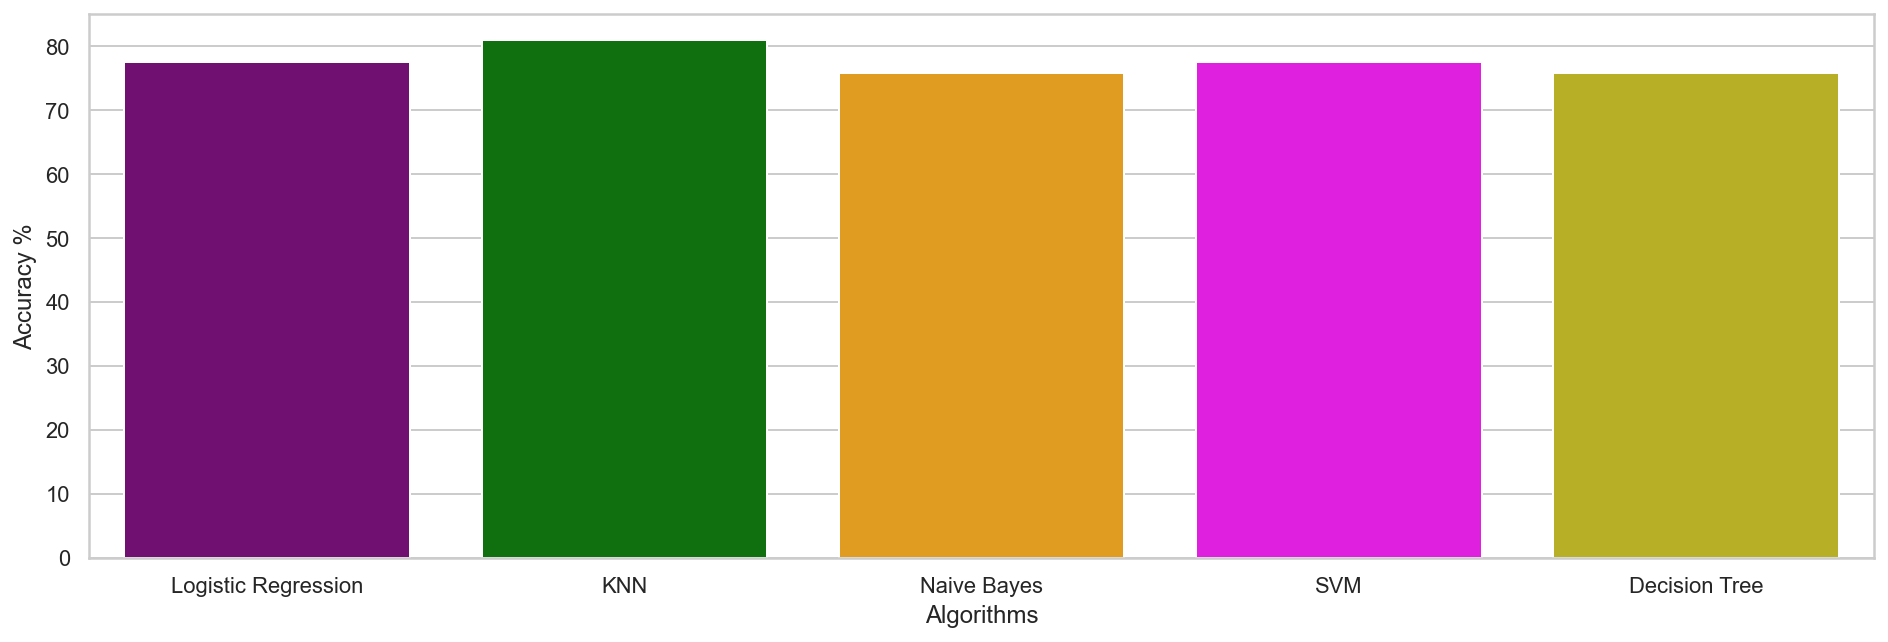

In [59]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

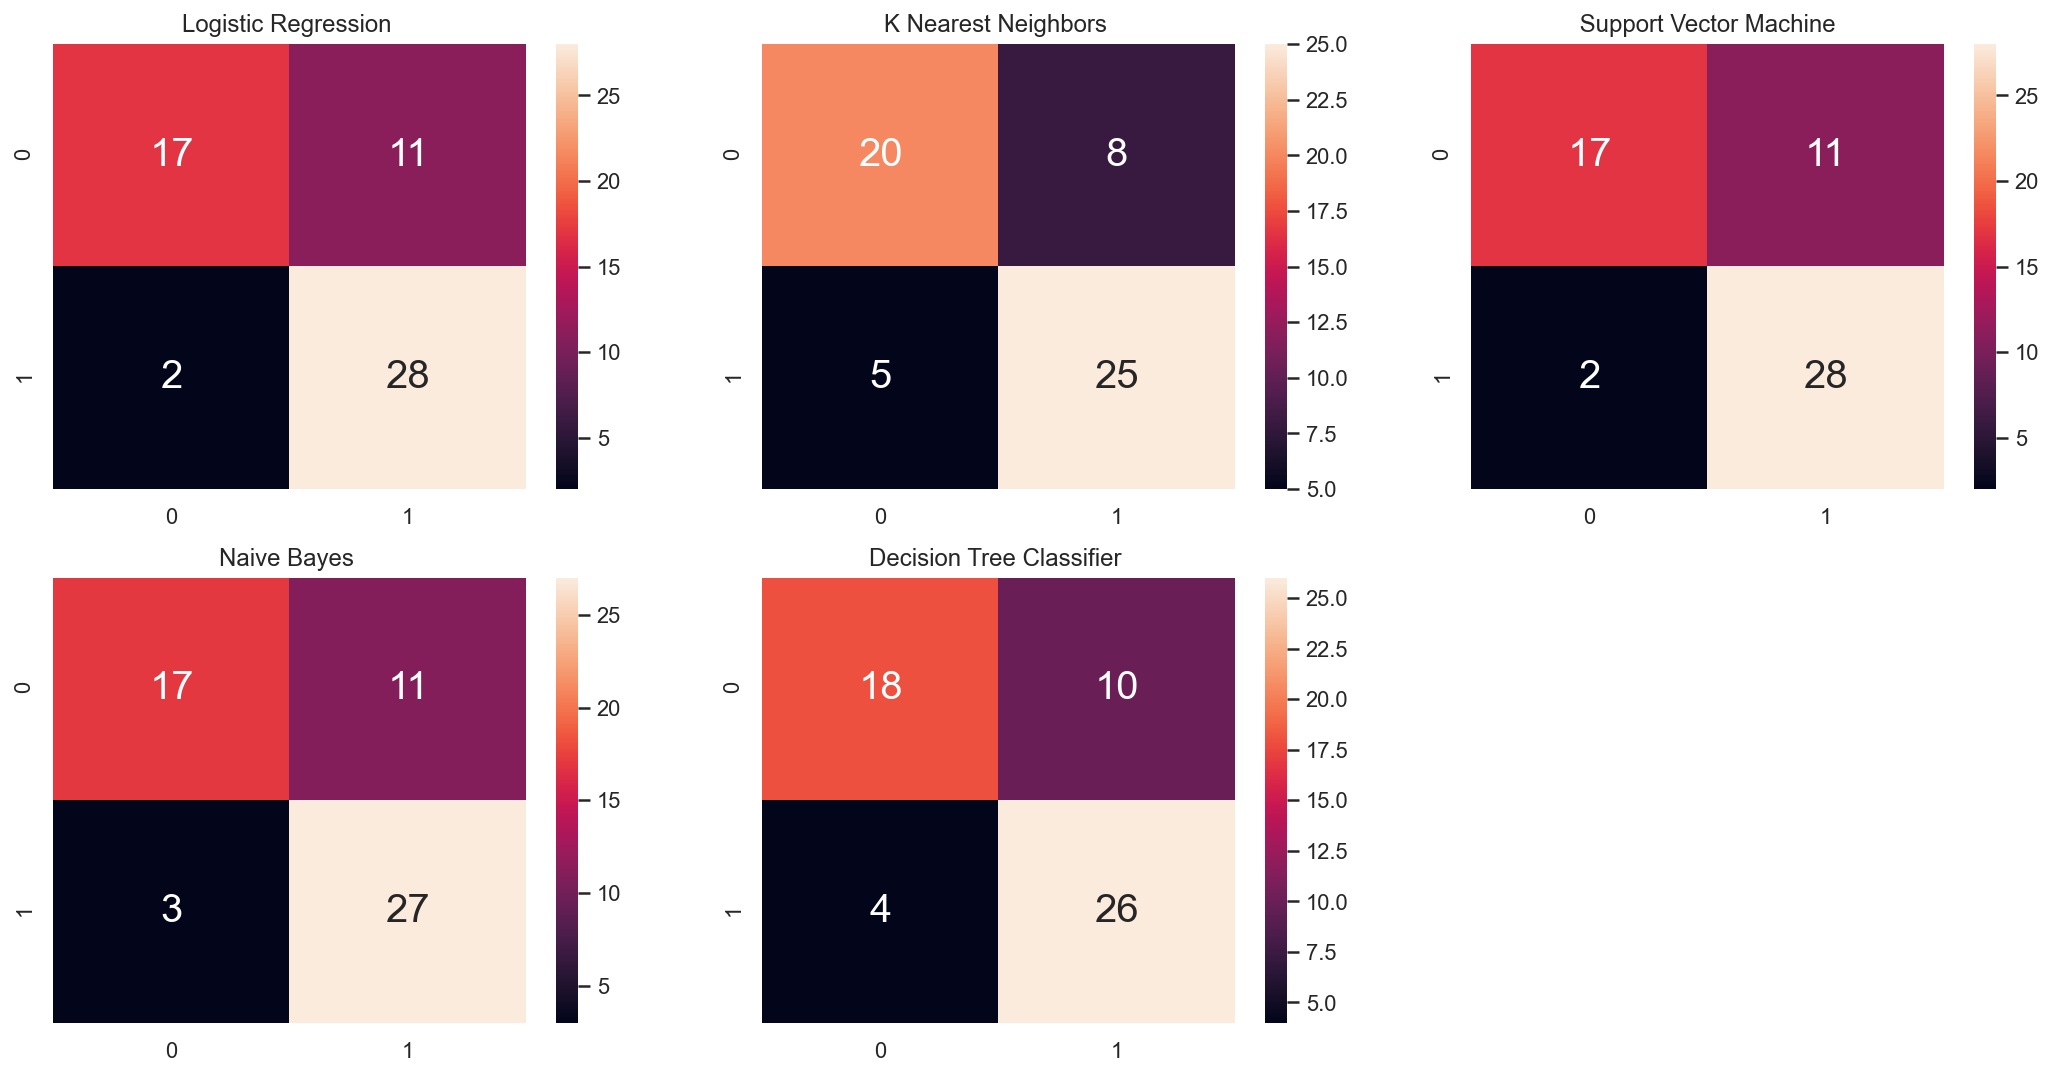

In [61]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

plt.figure(figsize=(18,9))



plt.subplot(2,3,1)
plt.title("Logistic Regression ")
sns.heatmap(cm_lr,annot=True,fmt="d",cbar=True, annot_kws={"size": 20})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors ")
sns.heatmap(cm_knn,annot=True,fmt="d",cbar=True, annot_kws={"size": 20})

plt.subplot(2,3,3)
plt.title(" Support Vector Machine ")
sns.heatmap(cm_svm,annot=True,fmt="d",cbar=True, annot_kws={"size": 20})

plt.subplot(2,3,4)
plt.title("Naive Bayes ")
sns.heatmap(cm_nb,annot=True,fmt="d",cbar= True, annot_kws={"size": 20})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier ")
sns.heatmap(cm_dtc,annot= True,fmt="d",cbar= True, annot_kws={"size": 20})

plt.show()